In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

In [2]:
print("Pauli-X gate: ")

qc_x = QuantumCircuit(1)

state_0 = Statevector.from_instruction(qc_x)
print("Initial state: ", state_0)

Pauli-X gate: 
Initial state:  Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [3]:
# Pauli-X
qc_x.x(0)
state_1 = Statevector.from_instruction(qc_x)
print("After passing through X: ", np.real(state_1.data))

After passing through X:  [0. 1.]


## Circuit Exercise ($|1\rangle \xrightarrow{H} \xrightarrow{X}$)

**Objective:**
Verify the manual calculation of applying a **Hadamard (H)** gate followed by a **Pauli-X (X)** gate to an initial state of $|1\rangle$.

**Theoretical Expectation:**
From our manual calculation, the X gate swaps the amplitudes of the $|-\rangle$ state, resulting in a **relative phase flip**:

$$
\begin{aligned}
\text{Initial:} \quad & |1\rangle \\
\xrightarrow{H} \quad & \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \quad (|-\rangle) \\
\xrightarrow{X} \quad & -\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
\end{aligned}
$$

Let's verify this using Qiskit's `Statevector`.

In [4]:
# (|1> -> H -> X)
qc_comb = QuantumCircuit(1)

qc_comb.x(0) # initial state |1>

# Apply H
qc_comb.h(0)

# Apply X again
qc_comb.x(0)

final_state = Statevector.from_instruction(qc_comb)
print("Final state: ", np.real(final_state.data))

print("\nCompare with the result calculated manually:")
print("[-0.70710678 0.70710678]")
print("(That is: -1/sqrt(2)|0> + 1/sqrt(2)|1>)")

Final state:  [-0.70710678  0.70710678]

Compare with the result calculated manually:
[-0.70710678 0.70710678]
(That is: -1/sqrt(2)|0> + 1/sqrt(2)|1>)


Circuit Diagram: 


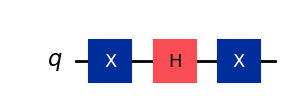


Bloch sphere (Arrow is on the equator, pointing in the opposite direction of phase):


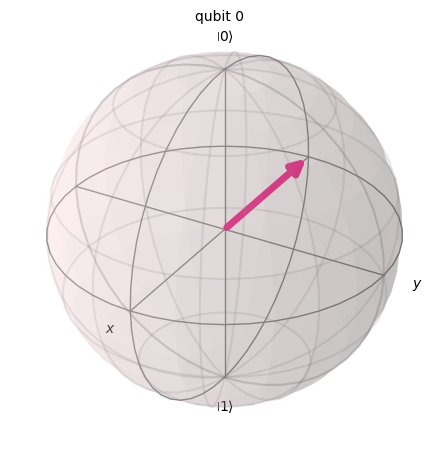

In [5]:
# Draw
print("Circuit Diagram: ")
display(qc_comb.draw('mpl'))

print("\nBloch sphere (Arrow is on the equator, pointing in the opposite direction of phase):")
display(plot_bloch_multivector(final_state))

In [6]:
# 7. Probability Measurement (Bonus)
probs = final_state.probabilities_dict()
print("\nMeasured probability:", probs)


Measured probability: {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}
